# 🏠 Introdução:

A busca pela sustentabilidade vem crescendo cada vez mais no contexto atual de mudanças climáticas, com o uso de materiais poluentes e não degradáveis por grandes indústrias, o que afeta o ecossistema global. Nesse sentido, estudar sistemas renováveis, como as energias solares, hidroelétricas, entre outros, é de suma importância, visando compreender seus componentes e potencial para aplicação em larga escala, substituindo gradativamente as fontes não renováveis. [1,2]

Encontrar os parâmetros desses sistemas que maximizem sua eficiência é uma tarefa difícil, especialmente se o tipo de energia contém várias instâncias, aumentando a complexidade do problema. Assim, o uso de ferramentas de Aprendizado de Máquina (*Machine Learning*, ou ML) é uma maneira eficaz para compreender a relação entre os diferentes parâmetros, permitindo fazer previsões sobre os dados fornecidos, tais como a capacidade de armazenamento de energia e de redução de gases do efeito estufa (ou Green House Gases, GHG's). [3,4]

Nesse sentido, combinar técnicas de ML com o Aprendizado Profundo (*Deep Learning*, ou DL) é uma estratégia interessante para estudar os sistemas de energia, sendo possível fazer previsões para os parâmetros desses sistemas e otimizá-los. Um exemplo de DL são as redes neurais, como a *Multi Layer Perceptron* (MLP), cuja arquitetura varia para cada parâmetro considerado. [5] Logo, o objetivo deste projeto é identificar e otimizar os hiperparâmetros de uma rede neural do tipo MLP para resolver um problema de regressão de interesse científico. 

Usou-se um dataset sobre sistemas de energia renovável [6] para o treinamento do modelo. Esse dataset contém informações detalhadas sobre diferentes sistemas de energia, que serão descritos abaixo. Nossos alvos (ou *targets*) a serem estimados são e eficiência no armazenamento de energia e a redução na emissão de GHG's, logo nesse notebook faremos uma análise inicial dos dados focando nos targets, computando algumas estatísticas descritivas e gráficos ilustrativos, além de fazer um pré-processamento inicial. Embora esses dados sejam sinteticamente produzidos, diversas técnicas e modelos foram empregados para mimetizar como os sistemas funcionam na realidade, garantindo que o dataset simule diferentes cenários e forneça valores plausíveis para essas energias renováveis, sendo uma fonte para estudos analíticos.

## 🖨️ Importações e definições:

Começamos importando as bibliotecas necessárias:

In [54]:
import pandas as pd
import numpy as np
import os
import statistics as st
import seaborn as sns

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

Em seguida, iremos importar o dataset a ser utilizado, removendo valores faltantes e exibindo-o em seguida.

In [55]:
df_energia = pd.read_csv('energy_dataset_.csv')
df_energia = df_energia.dropna()
df_energia

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


### 🔍 Características das Features

🔋 `Type_of_Renewable_Energy`:

Tipo de fonte de energia renovável (dados categóricos):

- `1`:  Solar  
- `2`:  Wind (Eólica)  
- `3`:  Hydroelectric (Hidroelétrica)  
- `4`:  Geothermal (Geotermal)  
- `5`:  Biomass (Biomassa)  
- `6`:  Tidal (Maré)  
- `7`:  Wave (Ondas)


⚡ `Installed_Capacity_MW`:

Capacidade instalada em Megawatts (MW)


🔌 `Energy_Production_MWh`:

Produção anual de energia em Megawatts-hora (MWh)



🔋 `Energy_Consumption_MWh`:

Consumo anual de energia em Megawatts-hora (MWh)



🏗️ `Grid_Integration_Level`:

Nível de integração com a rede elétrica (dados categóricos):

- `1`:  Fully Integrated (Totalmente integrada)  
- `2`:  Partially Integrated (Parcialmente integrada)  
- `3`:  Minimal Integration (Integração mínima)  
- `4`:  Isolated Microgrid (Microrrede isolada)



💰 `Founding_Sources`:

Fonte de investimento (dados categóricos):

- `1`:  Government (Governamental)  
- `2`:  Private (Privada)  
- `3`:  Public-Private Partnership (Colaboração Público e Privado)



💵 `Inicial_Investiment_USD`:

Investimento inicial em dólares (USD)


🌬️ `Air_Pollution_Reduction_Index`:

Índice de redução da poluição do ar


### 🔎 Características dos Targets

🔌 `Storage_Efficiency_Percentage`: 
     
Eficiência de armazenamento de energia em porcentagem


🌱 `GHG_Emission_Reduction_tCO2e`:

Redução das emissões de gases de efeito estufa (tCO2e)

## 🕵️ Explorando o Dataset:

Em um primeiro momento, é interessante investigar os dados que compreendem os *targets* do projeto, isto é, a porcentagem de eficiência de armazenamento de energia (Storage_Efficiency_Percentage) e a redução da emissão de gases do efeito estufa (GHG_Emission_Reduction_tCO2e), visando uma melhor compreensão de suas distribuições, e de como se comportam. Nesse sentido, utilizando a biblioteca `statistics`, algumas estatísticas descritivas dos dados serão analisadas. Dentre elas, encontra-se a média, a mediana, o desvio-padrão e os valores mínimo e máximo, com o intuito de analisar a tendência dos dados a serem previstos, bem como a distribuição deles. [7]

#### 🌘 Média

A média é calculada a partir da divisão da soma de todos os elementos que compõe uma variável aleatória pela quantidade total de termos. Essa estatística nos fornece uma tendência central dos valores da variável analisada.

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

[Fórmula 1: Cálculo da média]

In [56]:
media_target = st.mean(df_energia["Storage_Efficiency_Percentage"])
print(f'A média da porcentagem de eficiência energética é igual a {media_target:2f}%.')

A média da porcentagem de eficiência energética é igual a 75.219334%.


In [57]:
media_target2 = st.mean(df_energia["GHG_Emission_Reduction_tCO2e"])
print(f'A média da redução da emissão de gases do efeito estufa é igual a {media_target2:2f} toneladas de CO2.')

A média da redução da emissão de gases do efeito estufa é igual a 25234.722158 toneladas de CO2.


#### 🌗 Mediana

A mediana consiste em uma estatística que apresenta o valor que segrega a variável aleatória na metade, isto é, em dois grupos de mesmo tamanho, compreendendo o valor central da variável analisada. Por não ser influenciada por valores discrepantes que compõe o conjunto explorado - os famosos *outliers*-, a mediana compreende uma métrica mais robusta para compreender a tendência central dos dados, sobretudo quanto possuímos variáveis aleatórias com *outliers*.

In [58]:
mediana_target = st.median(df_energia["Storage_Efficiency_Percentage"])
print(f'A mediana da porcentagem de eficiência energética é igual a {mediana_target:2f}.')

A mediana da porcentagem de eficiência energética é igual a 75.279702.


In [59]:
mediana_target2 = st.median(df_energia["GHG_Emission_Reduction_tCO2e"])
print(f'A mediana da redução da emissão de gases do efeito estufa é igual a {mediana_target2:2f} toneladas de CO2.')

A mediana da redução da emissão de gases do efeito estufa é igual a 25424.477000 toneladas de CO2.


#### 🌖 Desvio-padrão

O desvio-padrão compreende o quão distante da média se encontram os valores que compõe a variável aleatória analisada.

$$
\sigma = \sqrt{\mathrm{Var(X)}} =  \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}
$$

[Fórmula 2: Cálculo do desvio-padrão]

In [60]:
desvio_padrao_target = st.pstdev(df_energia["Storage_Efficiency_Percentage"])
print(f'O desvio-padrão da porcentagem de eficiência energética é igual a {desvio_padrao_target:2f}.')

O desvio-padrão da porcentagem de eficiência energética é igual a 14.484807.


In [61]:
desvio_padrao_target2 = st.pstdev(df_energia["GHG_Emission_Reduction_tCO2e"])
print(f'O desvio-padrão da redução da emissão de gases do efeito estufa é igual a {desvio_padrao_target2:2f} toneladas de CO2.')

O desvio-padrão da redução da emissão de gases do efeito estufa é igual a 14378.435972 toneladas de CO2.


#### 🌕 Valores Mínimo e Máximo 

Através da análise do menor valor dos dados (mínimo) e do maior valor contido no conjunto (máximo), é possível compreender melhor a distribuição da variável aleatória analisada, assim como entender o resultado de outras métricas computadas, a exemplo da média, da mediana e do desvio-padrão.

In [62]:
valor_minimo_target = min(df_energia["Storage_Efficiency_Percentage"])
print(f'O menor valor da porcentagem de eficiência energética é igual a {valor_minimo_target:2f}.')

O menor valor da porcentagem de eficiência energética é igual a 50.003494.


In [63]:
valor_maximo_target = max(df_energia["Storage_Efficiency_Percentage"])
print(f'O maior valor da porcentagem de eficiência energética é igual a {valor_maximo_target:2f}.')

O maior valor da porcentagem de eficiência energética é igual a 99.994955.


In [64]:
valor_minimo_target2 = min(df_energia["GHG_Emission_Reduction_tCO2e"])
print(f'O menor valor da redução da emissão de gases do efeito estufa é igual a {valor_minimo_target2:2f} toneladas de CO2.')

O menor valor da redução da emissão de gases do efeito estufa é igual a 100.974460 toneladas de CO2.


In [65]:
valor_maximo_target2 = max(df_energia["GHG_Emission_Reduction_tCO2e"])
print(f'O maior valor da redução da emissão de gases do efeito estufa é igual a {valor_maximo_target2:2f} toneladas de CO2.')

O maior valor da redução da emissão de gases do efeito estufa é igual a 49997.578530 toneladas de CO2.


### 🌑 O que podemos tirar disso?

Pautando-se nas estatísticas descritivas apresentadas, podemos obter informações valiosas acerca dos dados que se pretende prever no presente projeto, isto é, dos *targets*. Desse modo, com base nos valores de média e mediana próximos, bem como nos valores máximo e mínimo - os quais não tão distantes entre si, fica evidente que os dados não apresentam valores tão discrepantes, isto é, não há *outliers* consideráveis. Tal observação é amparada haja vista os baixos resultados obtidos para os desvios-padrão dos *targets* observados. Além disso, o Gráfico 1 e o Gráfico 2, que apresentam *boxplots* dos dados que compõe os conjuntos analisados, suportam a conclusão exprimida, já que demonstra a ausência de *outliers*, assim como mostram que a maior parte dos dados encontram-se próximos a mediana (segundo quartil). Ainda com base na observação dos *boxplots*, é possível denotar que essa métrica se revela (aparentemente) equidistante do primeiro quartil (que contém 25% dos dados) e do terceiro quartil (que abrange 75% dos dados) para ambos os *targets* analisados.

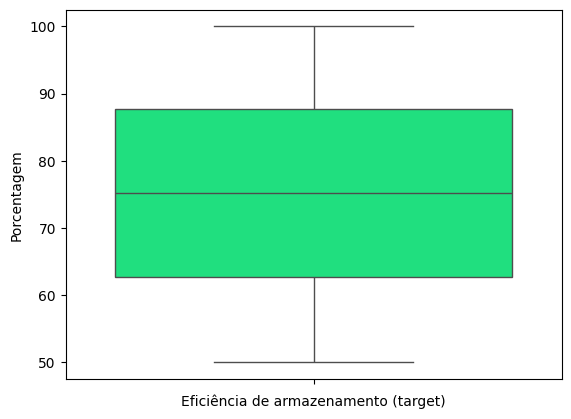

In [66]:
eixo = sns.boxplot(y=df_energia["Storage_Efficiency_Percentage"], color = "SpringGreen")
eixo.set_xlabel("Eficiência de armazenamento (target)")
eixo.set_ylabel("Porcentagem");

[Gráfico 1: *Boxplot* do *target* eficiência de armazenamento]

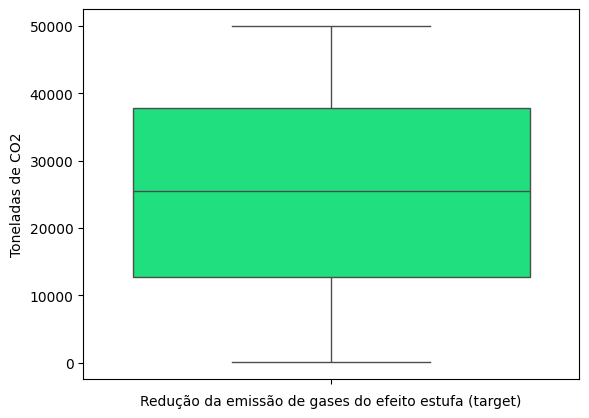

In [67]:
eixo = sns.boxplot(y=df_energia["GHG_Emission_Reduction_tCO2e"], color = "SpringGreen")
eixo.set_xlabel("Redução da emissão de gases do efeito estufa (target)")
eixo.set_ylabel("Toneladas de CO2");

[Gráfico 2: *Boxplot* do *target* redução da emissão de gases do efeito estufa]

## 📄 Pré-processamento:

É comum em Machine Learning realizar um pré-processamento do dataset, como a normalização dos dados e a divisão do dataset em dados de treino, validação e teste. Essas técnicas permitem que o treinamento dos algoritmos seja mais eficiente, convertendo os dados em uma escala adequada, além de evitar um sobre-ajuste (ou *overfitting*) dos dados, em que o modelo "decora" as informações e não consegue extrapolar para novos exemplos. [8]

Definindo as contantes utilizadas:

In [68]:
TAMANHO_TESTE = 0.1
TAMANHO_VALIDACAO = 0.1
SEMENTE_ALEATORIA = 1249

Evidenciando os targets e features do problema:

In [69]:
TARGET = ["Storage_Efficiency_Percentage", "GHG_Emission_Reduction_tCO2e"]
FEATURES = [
    "Type_of_Renewable_Energy",
    "Grid_Integration_Level",
    "Funding_Sources",
    "GHG_Emission_Reduction_tCO2e",
    "Installed_Capacity_MW",
    "Energy_Production_MWh",
    "Energy_Consumption_MWh",
    "Initial_Investment_USD",
    "Air_Pollution_Reduction_Index",
]

Dividindo o dataset em treino e teste, com 20% dos dados pra teste:

In [70]:
indices = df_energia.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA, shuffle=True
)

df_energia_treino = df_energia.loc[indices_treino]
df_energia_teste = df_energia.loc[indices_teste]

Separando o dataset de treino para as *features* e *targets*:

In [71]:
#treino
df_treino_target = df_energia_treino.reindex(TARGET, axis=1)
df_treino_features = df_energia_treino.reindex(FEATURES, axis=1)

Separando o dataset de teste para as *features* e *targets*:

In [72]:
#teste
df_teste_target = df_energia_teste.reindex(TARGET, axis=1)
df_teste_features = df_energia_teste.reindex(FEATURES, axis=1)

Explicitando os dados de treino e teste que serão utilizados no treinamento:

In [73]:
X_treino = df_treino_features.values
y_treino = df_treino_target.values

X_teste = df_teste_features.values
y_teste = df_teste_target.values

Por fim, separando os dados de treino em treino e validação, com 10% pra validação:

In [74]:
X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size = TAMANHO_VALIDACAO, random_state = SEMENTE_ALEATORIA, shuffle = True)

Um tipo de normalização é o **Máximo Absoluto**, a qual converte os dados no intervalo $[-1, 1]$. Uma vantagem dessa normalização é que ela mantém a esparsidade dos seus dados, além de transformá-los em uma escala em comum, o que é uma excelente escolha para treinar modelos como as redes neurais artificiais. Sua fórmula é a seguinte, cujo cálculo consiste em dividir os dados pelo valor máximo absoluto:

$$ n_i = \frac{x_i}{\max(|x|)} $$


[Fórmula 3: Normalização pelo Máximo Absoluto] 

Aplicando a normalização por uma biblioteca do Sklearn. Nesse caso, normalizou-se apenas algumas colunas, pois os atributos 'Type_of_Renewable_Energy', 'Grid_Integration_Level' e 'Funding_Sources' possuem dados discretos e pequenos, que são necessários para agrupar os tipos de energia e fornecer informações relevantes sobre o dataset. (falar com ele dps)

In [75]:
# df_energia_normalizado = df_energia.copy()
# colunas_fixas = ['Type_of_Renewable_Energy', 'Grid_Integration_Level','Funding_Sources']
# colunas_variaveis = df_energia_normalizado.columns.difference(colunas_fixas)

# normalizador = StandardScaler()
# df_energia_normalizado[colunas_variaveis] = normalizador.fit_transform(df_energia_normalizado[colunas_variaveis])
# df_energia_normalizado

Aplicando a normalização por Máximo Absoluto, ajustando-a aos dados de treino e aplicando aos demais dados:

In [76]:
scaler = MaxAbsScaler()

#Para os valores de X

scaler.fit(X_treino)

X_treino = scaler.transform(X_treino)
X_teste  = scaler.transform(X_teste)
X_val = scaler.transform(X_val)

#Para os valores de y:

#Transformando em arrays 2D
y_treino = y_treino.reshape(-1,1)
y_teste  = y_teste.reshape(-1,1)
y_val = y_val.reshape(-1,1)

#aplicando a normalização
scaler.fit(y_treino) 

y_treino = scaler.transform(y_treino)
y_teste  = scaler.transform(y_teste)
y_val = scaler.transform(y_val)

In [77]:
X_treino

array([[0.71428571, 0.5       , 0.33333333, ..., 0.61059449, 0.20248304,
        0.6909906 ],
       [0.71428571, 1.        , 0.33333333, ..., 0.90761518, 0.51418599,
        0.72535242],
       [0.14285714, 0.75      , 1.        , ..., 0.44863618, 0.54590918,
        0.36468683],
       ...,
       [0.85714286, 0.75      , 1.        , ..., 0.49675043, 0.41262   ,
        0.0497251 ],
       [1.        , 1.        , 1.        , ..., 0.04334167, 0.01117793,
        0.56592955],
       [0.14285714, 0.5       , 0.33333333, ..., 0.31682593, 0.28678618,
        0.88308292]])

Assim, foi feita uma análise inicial dos dados do nosso dataset, permitindo fazer um pré-processamento, além de gráficos ilutrativos sobre os *targets* do problema

## 📜 Referências

[1] Programa das Nações Unidas para o Desenvolvimento. (2024, 25 de abril). What is the sustainable energy transition and why is it key to tackling climate change? Climate Promise. Recuperado de https://climatepromise.undp.org/news-and-stories/what-sustainable-energy-transition-and-why-it-key-tackling-climate-change

[2] Organização das Nações Unidas. (s.d.). Renewable energy – Powering a safer future. Recuperado em 2 de junho de 2025, de https://www.un.org/en/climatechange/raising-ambition/renewable-energy

[3] Ergun, S., Dik, A., Boukhanouf, R., & Omer, S. (2025). Large-Scale Renewable Energy Integration: Tackling Technical Obstacles and Exploring Energy Storage Innovations. Sustainability, 17(3), 1311. https://doi.org/10.3390/su17031311

[4] Alabi, M. (2023). Integrating Machine Learning into Renewable Energy Systems for Better Forecasting. ResearchGate. https://www.researchgate.net/publication/384329216_Integrating_Machine_Learning_into_Renewable_Energy_Systems_for_Better_Forecasting

[5] Alharbi, A. H., Khafaga, D. S., Zaki, A. M., M., S., Ibrahim, A., Abdelhamid, A. A., Eid, M. M., Khodadadi, N., Abualigah, L., & Saeed, M. A. (2024). Forecasting of energy efficiency in buildings using multilayer perceptron regressor with waterwheel plant algorithm hyperparameter. Frontiers in Energy Research, 12, 1393794. https://doi.org/10.3389/fenrg.2024.1393794

[6] Kaggle. (2024). Renewable Energy Systems Data. https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems?select=energy_dataset_.csv. 

[7] Daniel Roberto Cassar. (2024). Jupyter Notebook 'LMA-203 1.0 - Estatística descritiva'. [Material não publicado].

[8] Daniel Roberto Cassar. (2024). Jupyter Notebook 'ATP-203 1.1 - Tratamento de dados'. [Material não publicado].